In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

c:\Users\varun\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
#importing the dataset
data = pd.read_csv('../Data/f2.csv')
data.head()

Temparature  Humidity  Moisture Soil_Type Crop_Type  Nitrogen  Potassium  \
0           20        83        26    Clayey      rice        90         49   
1           25        84        32     Loamy      rice        66         59   
2           33        64        50     Loamy     Wheat        41          0   
3           34        65        54     Loamy     Wheat        38          0   
4           38        72        51     Loamy     Wheat        39          0   

   Phosphorous Fertilizer  
0           36       Urea  
1           36       Urea  
2            0       Urea  
3            0       Urea  
4            0       Urea

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temparature  552 non-null    int64 
 1   Humidity     552 non-null    int64 
 2   Moisture     552 non-null    int64 
 3   Soil_Type    552 non-null    object
 4   Crop_Type    552 non-null    object
 5   Nitrogen     552 non-null    int64 
 6   Potassium    552 non-null    int64 
 7   Phosphorous  552 non-null    int64 
 8   Fertilizer   552 non-null    object
dtypes: int64(6), object(3)
memory usage: 38.9+ KB


In [7]:
#changing the column names
data.rename(columns={'Humidity ':'Humidity','Soil Type':'Soil_Type','Crop Type':'Crop_Type','Fertilizer Name':'Fertilizer'},inplace=True)

In [8]:
#checking unique values
data.nunique()

Temparature    21
Humidity       34
Moisture       41
Soil_Type       5
Crop_Type      17
Nitrogen       47
Potassium      31
Phosphorous    36
Fertilizer     14
dtype: int64

In [9]:
#checking for null values
data.isna().sum()

Temparature    0
Humidity       0
Moisture       0
Soil_Type      0
Crop_Type      0
Nitrogen       0
Potassium      0
Phosphorous    0
Fertilizer     0
dtype: int64

In [10]:
data['Fertilizer'].unique()

array(['Urea', 'TSP', 'Superphosphate', 'Potassium sulfate.',
       'Potassium chloride', 'DAP', '28-28', '20-20', '17-17-17',
       '15-15-15', '14-35-14', '14-14-14', '10-26-26', '10-10-10'],
      dtype=object)

In [11]:
data['Crop_Type'].unique()

array(['rice', 'Wheat', 'Tobacco', 'Sugarcane', 'Pulses', 'pomegranate',
       'Paddy', 'Oil seeds', 'Millets', 'Maize', 'Ground Nuts', 'Cotton',
       'coffee', 'watermelon', 'Barley', 'kidneybeans', 'orange'],
      dtype=object)

In [12]:
#statistical parameters
data.describe(include='all')

Temparature    Humidity    Moisture Soil_Type Crop_Type    Nitrogen  \
count    552.000000  552.000000  552.000000       552       552  552.000000   
unique          NaN         NaN         NaN         5        17         NaN   
top             NaN         NaN         NaN     Loamy    Cotton         NaN   
freq            NaN         NaN         NaN       192        64         NaN   
mean      28.630435   64.557971   42.840580       NaN       NaN   28.521739   
std        5.088082   11.880236   11.507275       NaN       NaN   29.121989   
min        0.000000   50.000000   25.000000       NaN       NaN    0.000000   
25%       26.000000   54.000000   33.000000       NaN       NaN   10.000000   
50%       29.000000   62.000000   41.000000       NaN       NaN   15.000000   
75%       32.000000   68.000000   51.000000       NaN       NaN   37.000000   
max       38.000000   95.000000   65.000000       NaN       NaN  126.000000   

         Potassium  Phosphorous Fertilizer  
count   552.000000   552.000000        552  
unique         NaN          NaN         14  
top            NaN          NaN       Urea  
freq           NaN          NaN        108  
mean     10.144928    21.115942        NaN  
std      13.456956    14.920514        NaN  
min       0.000000     0.000000        NaN  
25%       0.000000     8.000000        NaN  
50%       0.000000    20.000000        NaN  
75%      18.000000    36.000000        NaN  
max      59.000000    54.000000        NaN

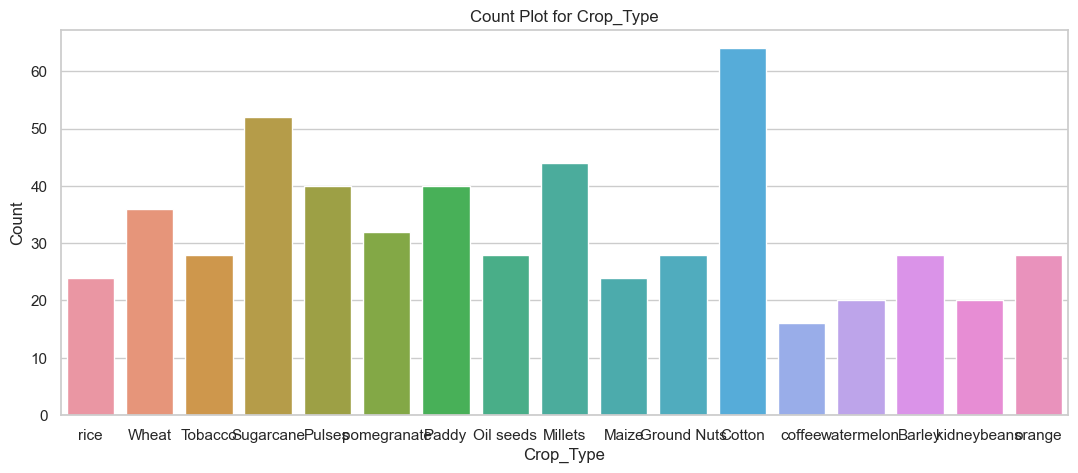

In [13]:
plt.figure(figsize=(13, 5))
sns.set(style="whitegrid")
sns.countplot(data=data, x='Crop_Type')
plt.title('Count Plot for Crop_Type')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.show()

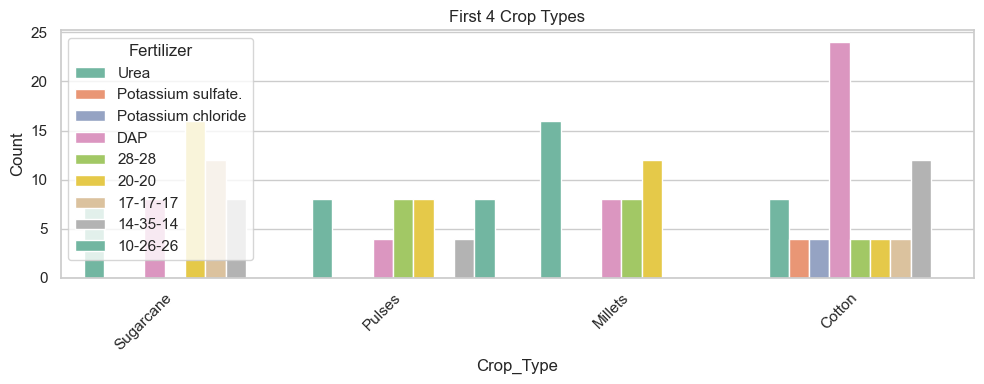

In [14]:
#first 4 crop types
part1_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[:4])]

# Create the first countplot
plt.figure(figsize=(10, 4))
sns.set(style="whitegrid")
sns.countplot(data=part1_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('First 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

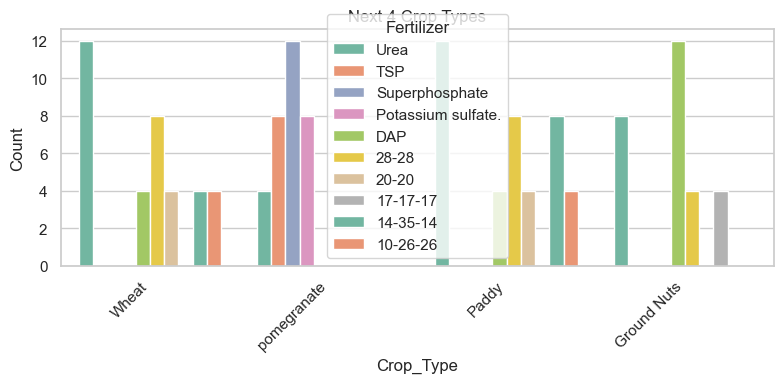

In [15]:
# Split the data into three parts: next 4 crop types
part2_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[4:8])]

# Create the second countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part2_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Next 4 Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

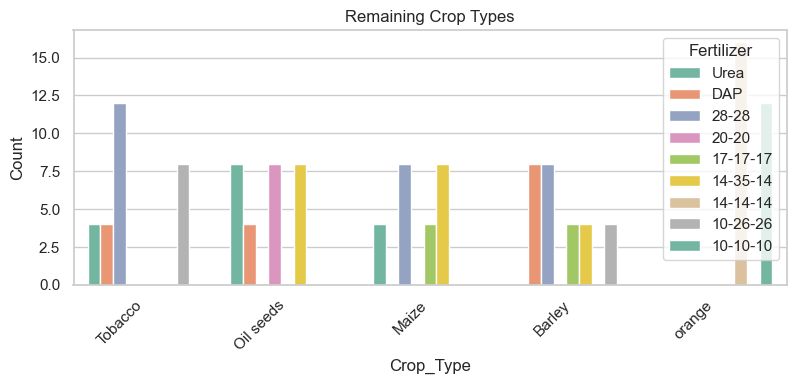

In [16]:
# Split the data into three parts: remaining crop types
part3_data = data[data['Crop_Type'].isin(data['Crop_Type'].value_counts().index[8:13])]

# Create the third countplot
plt.figure(figsize=(8, 4))
sns.set(style="whitegrid")
sns.countplot(data=part3_data, x='Crop_Type', hue='Fertilizer', width=0.8, palette='Set2')
plt.title('Remaining Crop Types')
plt.xlabel('Crop_Type')
plt.ylabel('Count')
plt.legend(title='Fertilizer')
plt.xticks(rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

<Axes: >

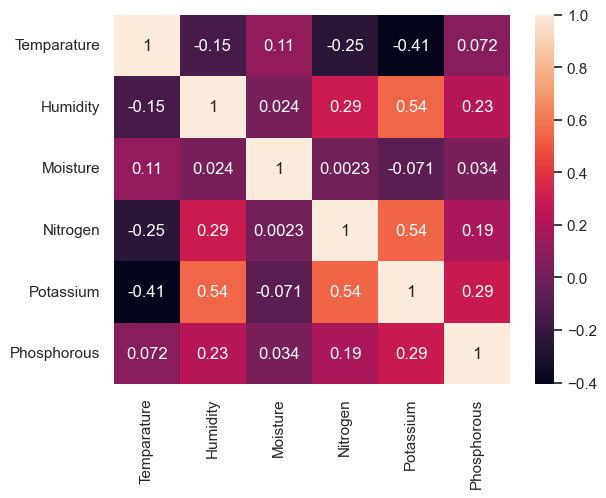

In [17]:
# Import necessary libraries
import seaborn as sns
import numpy as np

# Select only numeric columns from the dataframe
numeric_data = data.select_dtypes(include=[np.number])

# Heatmap for Correlation Analysis
sns.heatmap(numeric_data.corr(), annot=True)


#here is no such correlation between any of variables.. 

In [18]:
#encoding the labels for categorical variables
from sklearn.preprocessing import LabelEncoder
#it  transforming non-numeric data into a numeric format

In [19]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
data.Soil_Type = encode_soil.fit_transform(data.Soil_Type)

data.head()
#creating the DataFrame
# Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
# Soil_Type = Soil_Type.set_index('Original')
# Soil_Type

Temparature  Humidity  Moisture  Soil_Type Crop_Type  Nitrogen  Potassium  \
0           20        83        26          1      rice        90         49   
1           25        84        32          2      rice        66         59   
2           33        64        50          2     Wheat        41          0   
3           34        65        54          2     Wheat        38          0   
4           38        72        51          2     Wheat        39          0   

   Phosphorous Fertilizer  
0           36       Urea  
1           36       Urea  
2            0       Urea  
3            0       Urea  
4            0       Urea

In [20]:
#encoding Crop Type variable
encode_crop = LabelEncoder()

#fitting the label encoder
data.Crop_Type = encode_crop.fit_transform(data.Crop_Type)

data.head()
#creating the DataFrame
# Crop_Type = pd.DataFrame(zip(encode_crop.classes_,encode_crop.transform(encode_crop.classes_)),columns=['Original','Encoded'])
# Crop_Type = Crop_Type.set_index('Original')
# Crop_Type

Temparature  Humidity  Moisture  Soil_Type  Crop_Type  Nitrogen  Potassium  \
0           20        83        26          1         15        90         49   
1           25        84        32          2         15        66         59   
2           33        64        50          2         10        41          0   
3           34        65        54          2         10        38          0   
4           38        72        51          2         10        39          0   

   Phosphorous Fertilizer  
0           36       Urea  
1           36       Urea  
2            0       Urea  
3            0       Urea  
4            0       Urea

In [21]:
# #encoding Fertilizer variable
# encode_ferti = LabelEncoder()

# #fitting the label encoder
# data.Fertilizer = encode_ferti.fit_transform(data.Fertilizer)

# #creating the DataFrame
# Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['Original','Encoded'])
# Fertilizer = Fertilizer.set_index('Original')
# Fertilizer

In [22]:
features = data[['Temparature',"Humidity","Moisture",	"Soil_Type","Crop_Type","Nitrogen",	"Potassium","Phosphorous"]]
target = data['Fertilizer']

In [23]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)


# here 20% of the data should be used for testing (evaluation), and the remaining 80% is used for training
#x_train and x_test = contain the features (independent variables) used for training and testing the model
#y_train and y_test = contains the labels(dependent variable) used for training and testing the model.


In [24]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 100 to 168
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  441 non-null    int64
 1   Humidity     441 non-null    int64
 2   Moisture     441 non-null    int64
 3   Soil_Type    441 non-null    int32
 4   Crop_Type    441 non-null    int32
 5   Nitrogen     441 non-null    int64
 6   Potassium    441 non-null    int64
 7   Phosphorous  441 non-null    int64
dtypes: int32(2), int64(6)
memory usage: 27.6 KB


In [25]:
acc = [] # TEST
model = []
acc1=[] # TRIAN

Logistic regression model

In [26]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(x_train,y_train)

predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(metrics.classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  91.8918918918919
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         2
          10-26-26       1.00      1.00      1.00         7
          14-14-14       1.00      1.00      1.00         1
          14-35-14       1.00      1.00      1.00        12
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         6
             20-20       1.00      1.00      1.00         7
             28-28       1.00      1.00      1.00        16
               DAP       0.94      0.94      0.94        17
Potassium chloride       0.00      0.00      0.00         1
Potassium sulfate.       0.33      0.67      0.44         3
    Superphosphate       0.25      1.00      0.40         1
               TSP       0.83      0.56      0.67         9
              Urea       1.00      0.92      0.96        25

          accuracy                           0.92  

In [27]:
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(x_train,y_train)

predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))   

Naive Bayes's Accuracy is:  0.9099099099099099
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         2
          10-26-26       1.00      1.00      1.00         7
          14-14-14       1.00      1.00      1.00         1
          14-35-14       1.00      1.00      1.00        12
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         6
             20-20       1.00      1.00      1.00         7
             28-28       1.00      1.00      1.00        16
               DAP       1.00      0.88      0.94        17
Potassium chloride       1.00      1.00      1.00         1
Potassium sulfate.       1.00      0.33      0.50         3
    Superphosphate       0.14      1.00      0.25         1
               TSP       0.56      0.56      0.56         9
              Urea       1.00      0.92      0.96        25

          accuracy                           0.91  

In [28]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the features
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(x_train)
Xtest_scaled = scaler.transform(x_test)

# Create the SVM model with tuned parameters
SVM = SVC(C=1.0, gamma='scale', class_weight='balanced')  # Hyperparameter tuning for C and gamma

# Fit the model
SVM.fit(Xtrain_scaled, y_train)

# Predict the values
predicted_values = SVM.predict(Xtest_scaled)

# Calculate accuracy
x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')

# Output the accuracy
print("SVM's Accuracy is: ", x)

# Output the classification report
print(classification_report(y_test, predicted_values))

SVM's Accuracy is:  0.9279279279279279
                    precision    recall  f1-score   support

          10-10-10       1.00      1.00      1.00         2
          10-26-26       0.88      1.00      0.93         7
          14-14-14       1.00      1.00      1.00         1
          14-35-14       1.00      0.92      0.96        12
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         6
             20-20       1.00      1.00      1.00         7
             28-28       1.00      1.00      1.00        16
               DAP       1.00      0.88      0.94        17
Potassium chloride       1.00      1.00      1.00         1
Potassium sulfate.       0.50      1.00      0.67         3
    Superphosphate       1.00      1.00      1.00         1
               TSP       0.60      0.67      0.63         9
              Urea       1.00      0.92      0.96        25

          accuracy                           0.93       111

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.8468468468468469
                    precision    recall  f1-score   support

          10-10-10       1.00      0.50      0.67         2
          10-26-26       1.00      1.00      1.00         7
          14-14-14       0.50      1.00      0.67         1
          14-35-14       0.86      1.00      0.92        12
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         6
             20-20       1.00      1.00      1.00         7
             28-28       1.00      1.00      1.00        16
               DAP       0.67      0.71      0.69        17
Potassium chloride       0.00      0.00      0.00         1
Potassium sulfate.       0.33      0.67      0.44         3
    Superphosphate       1.00      1.00      1.00         1
               TSP       0.00      0.00      0.00         9
              Urea       0.96      1.00      0.98        25

          accuracy                         

In [30]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(x_train,y_train)

predicted_values = LogReg.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.8468468468468469
                    precision    recall  f1-score   support

          10-10-10       1.00      0.50      0.67         2
          10-26-26       1.00      1.00      1.00         7
          14-14-14       0.50      1.00      0.67         1
          14-35-14       0.86      1.00      0.92        12
          15-15-15       1.00      1.00      1.00         4
          17-17-17       1.00      1.00      1.00         6
             20-20       1.00      1.00      1.00         7
             28-28       1.00      1.00      1.00        16
               DAP       0.67      0.71      0.69        17
Potassium chloride       0.00      0.00      0.00         1
Potassium sulfate.       0.33      0.67      0.44         3
    Superphosphate       1.00      1.00      1.00         1
               TSP       0.00      0.00      0.00         9
              Urea       0.96      1.00      0.98        25

          accuracy                         

In [34]:
# Import necessary libraries
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import classification_report

# Encode the target labels (Ytrain and Ytest) since they contain string labels
label_encoder = LabelEncoder()

# Fit and transform on the training data, and transform on the test data
Ytrain_encoded = label_encoder.fit_transform(y_train)
Ytest_encoded = label_encoder.transform(y_test)

# Initialize the XGBoost classifier
XB = xgb.XGBClassifier()

# Fit the model with the encoded labels
XB.fit(x_train, Ytrain_encoded)

# Predict the values
predicted_values = XB.predict(x_test)

# Calculate accuracy score
x = metrics.accuracy_score(Ytest_encoded, predicted_values)

# Store the accuracy and model name for comparison (if needed later)
acc.append(x)
model.append('XGBoost')

# Output the accuracy
print("XGBoost's Accuracy is: ", x)

# Print classification report using encoded labels
print(classification_report(Ytest_encoded, predicted_values))

XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        16
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00        25

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       11

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

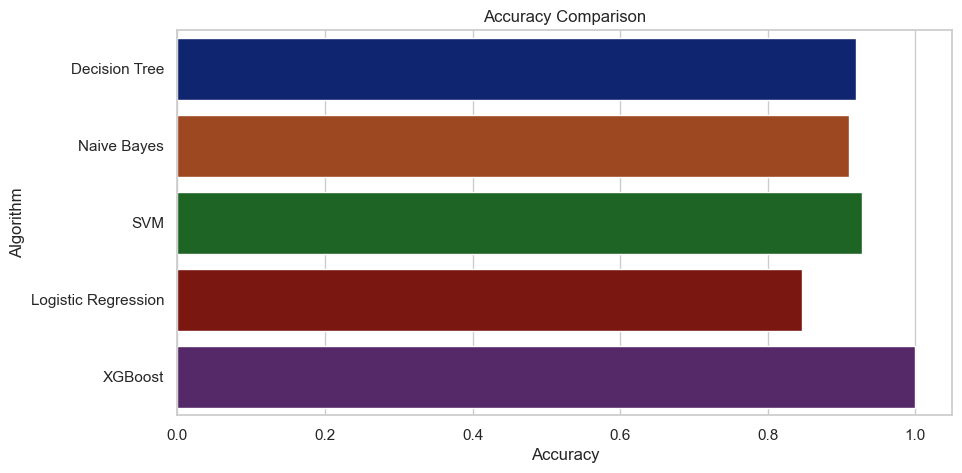

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
#pickling the file
import pickle
pickle_out = open('fertilizer.pkl','wb')
pickle.dump(XB,pickle_out)
pickle_out.close()

In [39]:
ferti = pickle.load(open('../Models/fertilizer.pkl','rb'))
ferti.classes_[1]

1

In [36]:
import joblib

# Save the model
joblib.dump(label_encoder, 'fertilizer_encoder.joblib')



['fertilizer_encoder.joblib']

In [50]:
joblib.dump(scaler, 'scaler2.joblib')

['scaler2.joblib']

In [40]:
print(soil_label_encoder.classes_)
print(crop_label_encoder.classes_)


NameError: name 'soil_label_encoder' is not defined